# Importing Libraries and Data

In [257]:
import pandas as pd
from kaggle.api.kaggle_api_extended import KaggleApi
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np


In [258]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


# Training Data EDA

In [259]:
Test_data= pd.read_csv('test.csv')
Train_Data= pd.read_csv('train.csv')
Train_Data.head()
X_train2=Train_Data.drop(columns='SalePrice')


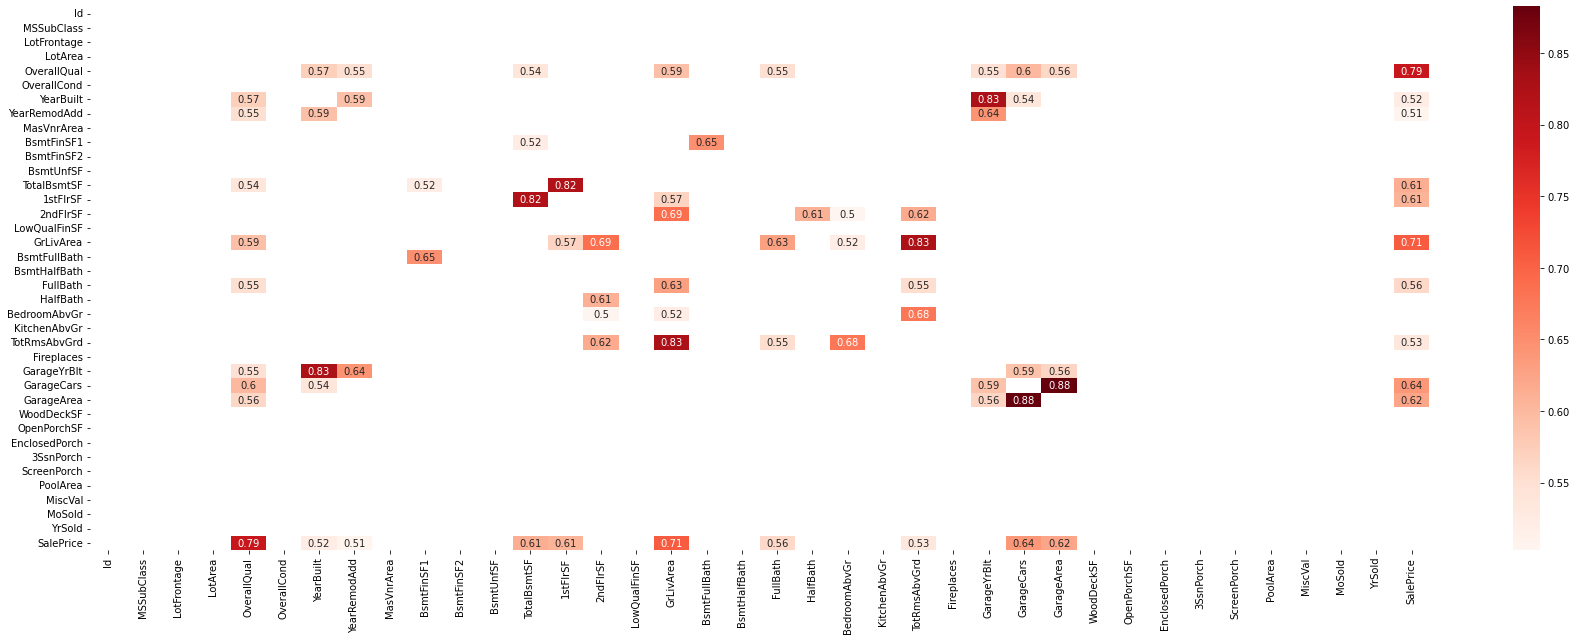

In [260]:
dfCorr = Train_Data.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sn.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

# Data Cleaning

In [261]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
num_pipeline= Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler()),
])

cat_pipeline= Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('Encoder',OneHotEncoder(sparse=False))
])
datatype= Train_Data.dtypes
num_cols = Train_Data.select_dtypes([np.number]).columns
cat_cols= datatype[(datatype == 'object') | (datatype == 'category')].index.tolist()
#print(cat_cols)
#print(num_cols)
num_attribs=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold',]
cat_attribs= ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Preprocess = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs),
])




Train_features= Train_Data[num_attribs + cat_attribs]
Train_target= Train_Data['SalePrice']



# Fit the data

In [317]:
lin_reg = LinearRegression()
Process_data=Preprocess.fit_transform(Train_Data)
lin_reg.fit(Process_data, Train_target)
Full_Prepped_X= Preprocess.transform(Train_Data)
housing_predictions=lin_reg.predict(Full_Prepped_X)

In [322]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_mse = mean_squared_error(Train_Data['SalePrice'], housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

20682.889422789613

## Considering 2 options: More complex model vs RFE to remove unneeded features.

### Option 1: RFE

In [301]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
#use linear regression as the model
#This is to select 10 variables: can be changed and checked in model for accuracy
rfe_mod = RFE(lin_reg ,n_features_to_select= 30, step=1) #RFECV(lin_reg, step=1, cv=5) 

num_pipeline= Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler()),
])

cat_pipeline= Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('Encoder',OneHotEncoder(sparse=False))
])
datatype= Train_Data.dtypes
num_cols = Train_Data.select_dtypes([np.number]).columns
cat_cols= datatype[(datatype == 'object') | (datatype == 'category')].index.tolist()
#print(cat_cols)
#print(num_cols)
num_attribs=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold',]
cat_attribs= ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Preprocess = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs),
])

Train_features= Train_Data[num_attribs + cat_attribs]
Train_target= Train_Data['SalePrice']

Feature_Prepared= Preprocess.fit_transform(Train_Data)
rfe_mod.fit(Feature_Prepared,Train_target)
Full_Prepped_data= Preprocess.transform(Train_Data)
RFE_Pred=rfe_mod.predict(Full_Prepped_data)
print(RFE_Pred)

from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=LinearRegression(),step=1,cv=5)
rfecv.fit(Feature_Prepared,Train_target)
RFECV_Pred= rfecv.predict(Full_Prepped_data)
print(RFECV_Pred) 


[183808. 250880. 225792. ... 141312. 141824. 141312.]
[194757.72117733 225552.0671704  225552.0671704  ... 144918.98813097
 175713.33412404 144918.98813097]


In [323]:
from sklearn.model_selection import cross_val_score
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
scores = cross_val_score(rfe_mod, Feature_Prepared, Train_target,
 scoring="neg_mean_squared_error", cv=10)
rfe_rmse_scores = np.sqrt(-scores)
scores = cross_val_score(rfecv, Feature_Prepared, Train_target,
 scoring="neg_mean_squared_error", cv=10)
rfecv_rmse_scores = np.sqrt(-scores)
scores = cross_val_score(lin_reg, Process_data, Train_target,
 scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

display_scores(rfe_rmse_scores)
display_scores(rfecv_rmse_scores)
display_scores(lin_rmse_scores)


Scores: [4.26543380e+04 4.71311459e+04 4.63436770e+04 5.40350095e+04
 2.88705844e+14 4.97818532e+04 4.86496813e+04 4.55593548e+04
 5.87702426e+15 5.29861892e+04]
Mean: 616573010603058.8
Standard deviation: 1755595125809323.0
Scores: [44250.20791344 51414.78520941 46839.55545592 68766.26467224
 64028.55787024 49748.5263446  49265.37768826 48963.36667452
 80811.52867357 58189.5077787 ]
Mean: 56227.767828089985
Standard deviation: 11064.66535805028
Scores: [1.69008538e+13 1.00084414e+14 2.19228330e+14 2.38446571e+12
 1.07978218e+14 6.81285356e+12 7.96755856e+12 8.50526824e+12
 1.27841144e+14 6.87359507e+13]
Mean: 66643905693772.23
Standard deviation: 68457793364841.68


### Option 2: More Complex Model